In [30]:
import pandas as pd
import os 
import glob 
import stats
import numpy as np
import matplotlib.pyplot as plt

from contextlib import contextmanager
import time

In [10]:
@contextmanager
def timed():
    start_time = time.time()
    yield
    end_time = time.time()
    print("Total execution time: \033[31;1;4m{}\033[0m sec".format(end_time - start_time))

# Read

## ALL

In [18]:
# file_io.py
def read_all_files_in_dir(): # TODO file path
    table_type = "wide"
    path = r"./test-data/"
    csv_files = glob.glob(os.path.join(path, "*" + table_type + ".csv")) 

    for f in csv_files: 
        file_name = os.path.basename(f)
        name_without_extension = os.path.splitext(file_name)
        split_fn = name_without_extension[0].split('_')
        
        df = pd.read_csv(f, header=0, index_col=None, engine='python') 
        stats.some_stat(df)

        print(f"Country: {split_fn[0]} {'\n'}League: {split_fn[1]} {'\n'}Year: {split_fn[2]} {'\n'}Table_type: {split_fn[3]}")
        print(df.to_string())

## Specific

In [97]:
last5_df = pd.read_csv("./test-data/england_premier-league_20232024_last.csv", header=0, index_col=None, engine='python') 
print(last5_df.to_string() + "\n")


ou_df = pd.read_csv("./test-data/england_premier-league_20232024_ou.csv", header=0, index_col=None, engine='python') 
print(ou_df.to_string() + "\n")

top_df = pd.read_csv("./test-data/england_premier-league_20232024_top.csv", header=0, index_col=None, engine='python') 
print(top_df.to_string() + "\n")

wide_df = pd.read_csv("./test-data/england_premier-league_20232024_wide.csv", header=0, index_col=None, engine='python') 
print(wide_df.to_string())



                       Team                     last 5
0           Manchester City  ['W', 'W', 'W', 'D', 'D']
1                   Arsenal  ['L', 'W', 'W', 'D', 'W']
2                 Liverpool  ['L', 'D', 'W', 'W', 'D']
3               Aston Villa  ['W', 'D', 'L', 'W', 'D']
4         Tottenham Hotspur  ['L', 'W', 'D', 'W', 'L']
5          Newcastle United  ['W', 'W', 'D', 'W', 'L']
6         Manchester United  ['D', 'D', 'L', 'D', 'W']
7           West Ham United  ['L', 'W', 'D', 'L', 'D']
8                   Chelsea  ['W', 'D', 'W', 'D', 'W']
9    Brighton & Hove Albion  ['D', 'L', 'D', 'L', 'W']
10  Wolverhampton Wanderers  ['D', 'L', 'D', 'L', 'W']
11                   Fulham  ['W', 'L', 'L', 'D', 'W']
12          AFC Bournemouth  ['D', 'L', 'W', 'W', 'W']
13           Crystal Palace  ['W', 'L', 'L', 'D', 'D']
14                Brentford  ['W', 'D', 'D', 'D', 'L']
15                  Everton  ['L', 'W', 'D', 'L', 'L']
16        Nottingham Forest  ['D', 'L', 'W', 'D', 'D']
17        

# Előfeldolgozás

In [113]:
def last_five_preprocess(Dataframe):
    Dataframe["W_count"] = Dataframe["last 5"].apply(lambda x: x.count("W"))
    Dataframe["Win_%"] = Dataframe["W_count"].apply(lambda x: ((x/5)*100))
    Dataframe["D_count"] = Dataframe["last 5"].apply(lambda x: x.count("D"))
    Dataframe["Draw_%"] = Dataframe["D_count"].apply(lambda x: ((x/5)*100))
    Dataframe["L_count"] = Dataframe["last 5"].apply(lambda x: x.count("L"))
    Dataframe["Lose_%"] = Dataframe["L_count"].apply(lambda x: ((x/5)*100))
    return Dataframe

print(last_five_preprocess(last5_df).drop("last 5", axis=1))

                       Team  W_count  Win_%  D_count  Draw_%  L_count  Lose_%
0           Manchester City        3   60.0        2    40.0        0     0.0
1                   Arsenal        3   60.0        1    20.0        1    20.0
2                 Liverpool        2   40.0        2    40.0        1    20.0
3               Aston Villa        2   40.0        2    40.0        1    20.0
4         Tottenham Hotspur        2   40.0        1    20.0        2    40.0
5          Newcastle United        3   60.0        1    20.0        1    20.0
6         Manchester United        1   20.0        3    60.0        1    20.0
7           West Ham United        1   20.0        2    40.0        2    40.0
8                   Chelsea        3   60.0        2    40.0        0     0.0
9    Brighton & Hove Albion        1   20.0        2    40.0        2    40.0
10  Wolverhampton Wanderers        1   20.0        2    40.0        2    40.0
11                   Fulham        2   40.0        1    20.0    

# Stats

In [110]:
# stats.py
def some_stat(Dataframe):
    np_array = Dataframe['W-T'].to_numpy().flatten()
    array_mean = np.mean(np_array)
    print(f"//STATS// | Total-wins-mean: {array_mean}")
    return array_mean, np_array




                       Team  W_count  Win_%  D_count  Draw_%  L_count  Lose_%
0           Manchester City        3   60.0        2    40.0        0     0.0
1                   Arsenal        3   60.0        1    20.0        1    20.0
2                 Liverpool        2   40.0        2    40.0        1    20.0
3               Aston Villa        2   40.0        2    40.0        1    20.0
4         Tottenham Hotspur        2   40.0        1    20.0        2    40.0
5          Newcastle United        3   60.0        1    20.0        1    20.0
6         Manchester United        1   20.0        3    60.0        1    20.0
7           West Ham United        1   20.0        2    40.0        2    40.0
8                   Chelsea        3   60.0        2    40.0        0     0.0
9    Brighton & Hove Albion        1   20.0        2    40.0        2    40.0
10  Wolverhampton Wanderers        1   20.0        2    40.0        2    40.0
11                   Fulham        2   40.0        1    20.0    

# Graphs

<BarContainer object of 4 artists>

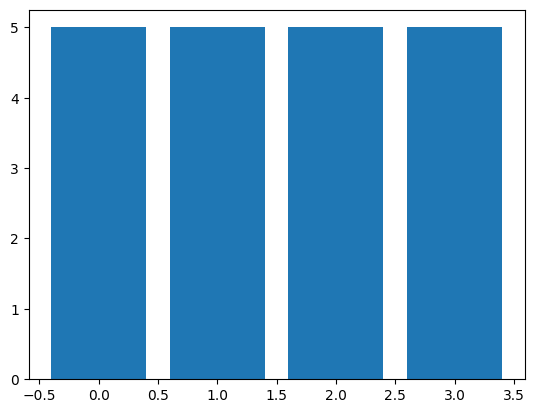

In [32]:
plt.bar([0,1,2,3], 5)

In [19]:
with timed():
    read_all_files_in_dir()

//STATS// | Total-wins-mean: 10.9375
Country: belgium 
League: pro-league 
Year: 20232024 
Table_type: wide
    rank                  team  MP-T  W-T  D-T  L-T  GF-T  GA-T  MP-H  W-H  D-H  L-H  GF-H  GA-H  MP-A  W-A  D-A  L-A  GF-A  GA-A  GD   P
0      1  Union Saint-Gilloise    30   21    7    2    63    31    15   11    3    1    34    16    15   10    4    1    29    15  32  70
1      2            Anderlecht    30   18    9    3    58    30    15   11    3    1    30    13    15    7    6    2    28    17  28  63
2      3               Antwerp    30   14   10    6    55    27    15    9    5    1    34    10    15    5    5    5    21    17  28  52
3      4           Club Brugge    30   14    9    7    62    29    15    8    6    1    35    14    15    6    3    6    27    15  33  51
4      5         Cercle Brugge    30   14    5   11    44    34    15    8    2    5    27    18    15    6    3    6    17    16  10  47
5      6                  Genk    30   12   11    7    51    31 